# Integración Numérica

In [1]:
import numpy as  np
import matplotlib.pyplot as plt
plt.rc('font', size =24)
plt.rc('figure', figsize=(15,8))
from scipy.special import roots_legendre
from scipy.integrate import quadrature

In [2]:
a = 0
b = 30

In [3]:
def df (z: np.ndarray) -> np.ndarray:
    return 200*(z / (z+5))*np.exp(-2*z/30)

def fdf(z: np.ndarray) -> np.ndarray:
    return z.dot(df(z))

def Itrapecios(f, a=0, b=30, n=100):
    x = np.linspace(a, b, n)
    dz = (b-a)/n
    return dz*f(x).sum()

def  Isimpson(f, a=0, b=30, n=100):
    if not n%2==1:
        n+=1
    x = np.linspace(a,b,n)
    dz = (b-a/n)
    feval = f(x)
    I = (b-a)*(feval[0] + feval[-1] + 4*feval[1:-3:2].sum() + 2*feval[2:-2:2].sum())/(3*(n-1))
    return I

def IGausQuadrature(f, a=0, b=30, n = 9):
    nodes, weights = roots_legendre(n)
    m = (b-a)/2
    c = (b+a)/2
    return m*np.dot(weights, [df(m*n+c) for n in nodes])

Tomamos como solucion validada la integral de scipy

In [4]:
Ival, err = quadrature(df, a, b, rtol=1e-16)

In [5]:
Ival

1480.56848008733

Lets set up a set of number of intervals I will use to asess convergence

In [6]:
nint = np.logspace(np.log10(5),2,10).astype(int)

Then I iteratively solve for each method

In [7]:
Methods = [Itrapecios, Isimpson, IGausQuadrature]

Solutions = {method.__name__ : np.array([method(df, n=thisn) for thisn in nint]) for method in Methods }

errors = {method: np.abs(np.diff(solution)/solution[1:]) for method, solution in Solutions.items()}

<div style="background:#222200">
    
lo mismo con bastante código repetido

``` python
solsit = np.array([Itrapecios(df, n=thisn) for thisn in nint])
solsis = np.array([Isimpson(df, n=thisn) for thisn in nint])
solsqg = np.array([IGausQuadrature(df, n=thisn) for thisn in nint])

    
    
```

``` python
#eit = np.abs((solsit - Ival)/Ival)
eit = np.abs(np.diff(solsit)/solsit[1:])

#eis = np.abs((solsis - Ival)/Ival)
eis = np.abs(np.diff(solsis)/solsis[1:])

#eig = np.abs((solsqg - Ival)/Ival)#
eig = np.abs(np.diff(solsqg)/solsqg[1:])
```

in a classical for nest
``` python

Solutions = {} 
for method in Methods:
    Solutions[method.__name__] = np.array([])
    for thisn in nint:
         np.append(Solutions[method.__name__], method(df, n=thisn))
         

```
    
</div>

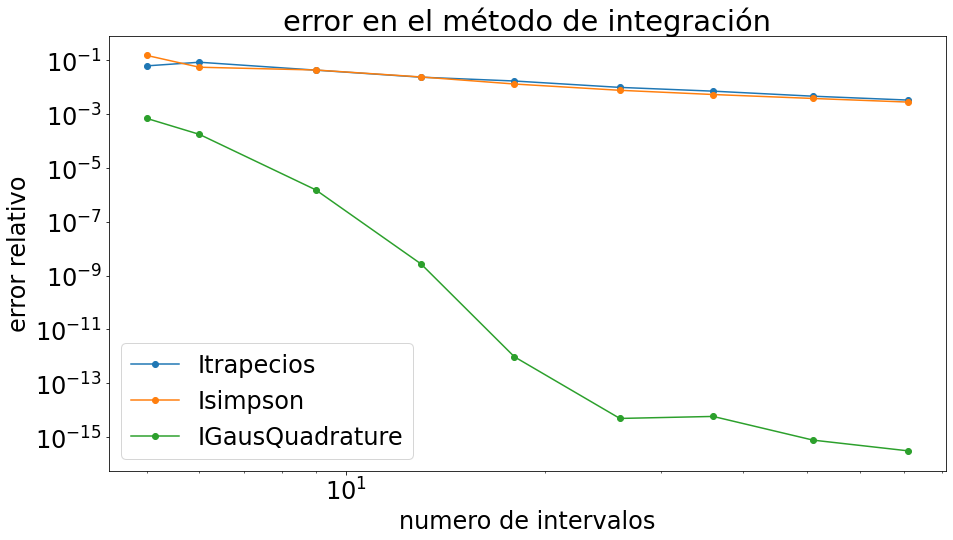

In [8]:
dotheplots = [plt.loglog(nint[:-1], error,'-o', label=method) for method, error in errors.items()]
plt.xlabel('numero de intervalos')
plt.ylabel('error relativo')
plt.title('error en el método de integración')
plt.legend()

## en funcion del numero de intervalos

In [9]:
errors

{'Itrapecios': array([0.06286519, 0.0856935 , 0.04359193, 0.02381481, 0.01718275,
        0.00994594, 0.00720138, 0.00467709, 0.00336088]),
 'Isimpson': array([0.15263911, 0.05588773, 0.04411115, 0.0242779 , 0.01328172,
        0.00775541, 0.00540804, 0.00385494, 0.00282867]),
 'IGausQuadrature': array([6.94884630e-04, 1.78877712e-04, 1.55351773e-06, 2.71483621e-09,
        9.61820644e-13, 4.91429995e-15, 5.83573120e-15, 7.67859368e-16,
        3.07143747e-16])}